In [1]:
from utils import *

# Embedding

In [2]:
dat = pd.read_csv('../data/q52_all.csv')
dat

,q,Response ID,RespondantNumber,answer
0,1,R_2CpRYXKreeqeReb,No1,That it's not a death sentence
1,1,R_2pRxwqsa5hYsyCE,No2,(nothing - she agreed to a double MX bc of lob...
2,1,R_2fJsKiHuhQEzF53,No3,1st Diagnosis: How likely is it to return.
3,1,R_3PcL0UmcNHUdZFY,No4,A mastectomy could have been avoided if the Br...
4,1,R_2PhVfuX6YchwTL6,No5,advantage of mastectomy over breast conserving...
...,...,...,...,...
1255,5,R_2WUTZ44nePzp70U,No1256,That mammograms can be wrong and miss ILC - to...
1256,5,R_1rPvaPoZNUAX8FL,No1257,the effects of fear of return
1257,5,R_3KIvyqzHthabhgH,No1258,The fact that it can metastasize in unusual pl...
1258,5,R_vHSVoXxE2ACIg13,No1259,What specifically to look for in the future in...


In [3]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [4]:
sentences = dat['answer'].tolist()

embedding = model.encode(sentences)
embedding.shape

(1260, 384)

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/e

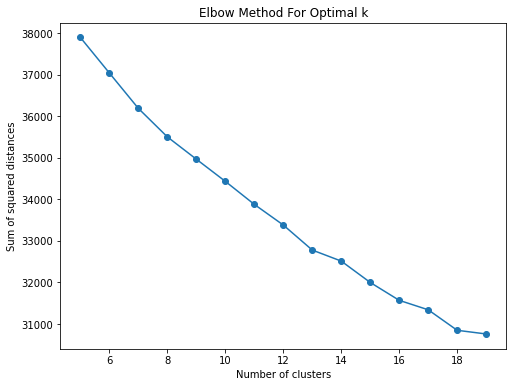

In [5]:
# Elbow point
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Compute sum of squared distances for a range of cluster numbers
inertia = []
K_range = range(5, 20)  # for example, check for up to 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(embedding)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.06651374


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.05330383


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.06351043


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.06443938


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.06265071


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.06972626


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11 The average silhouette_score is : 0.05941725


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12 The average silhouette_score is : 0.06795242


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13 The average silhouette_score is : 0.076645456


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14 The average silhouette_score is : 0.081187315


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15 The average silhouette_score is : 0.07339592


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 16 The average silhouette_score is : 0.08324158


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 17 The average silhouette_score is : 0.08233832


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 18 The average silhouette_score is : 0.07302247


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 19 The average silhouette_score is : 0.08375412


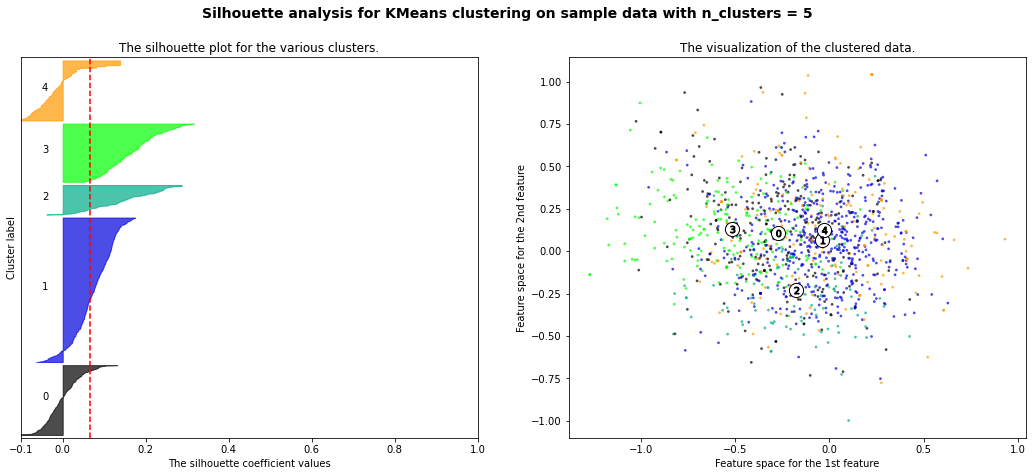

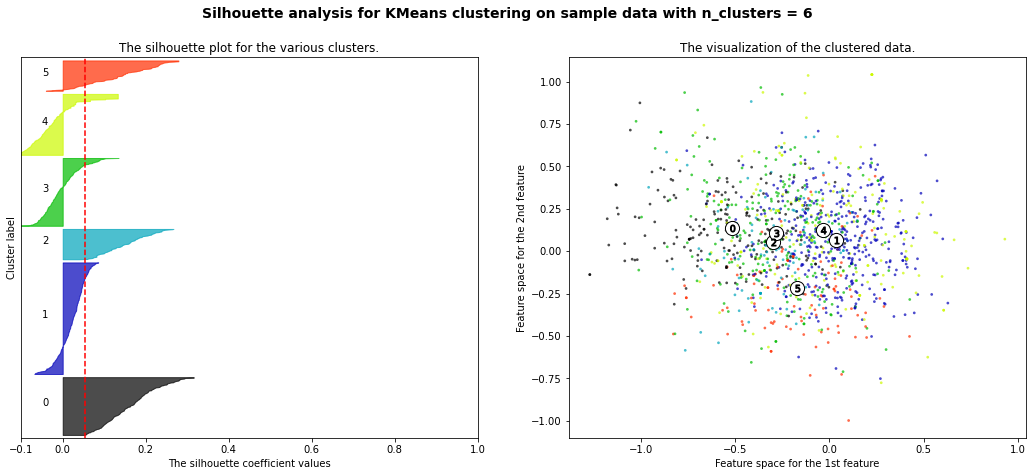

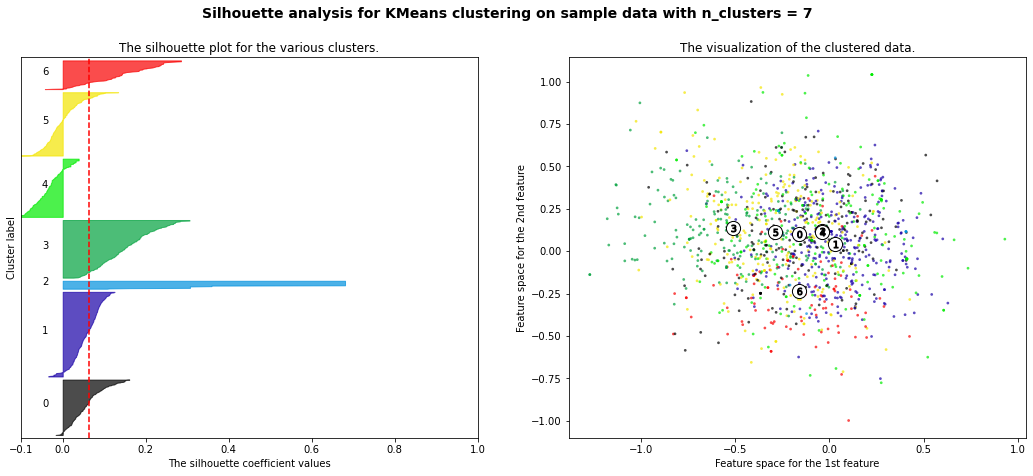

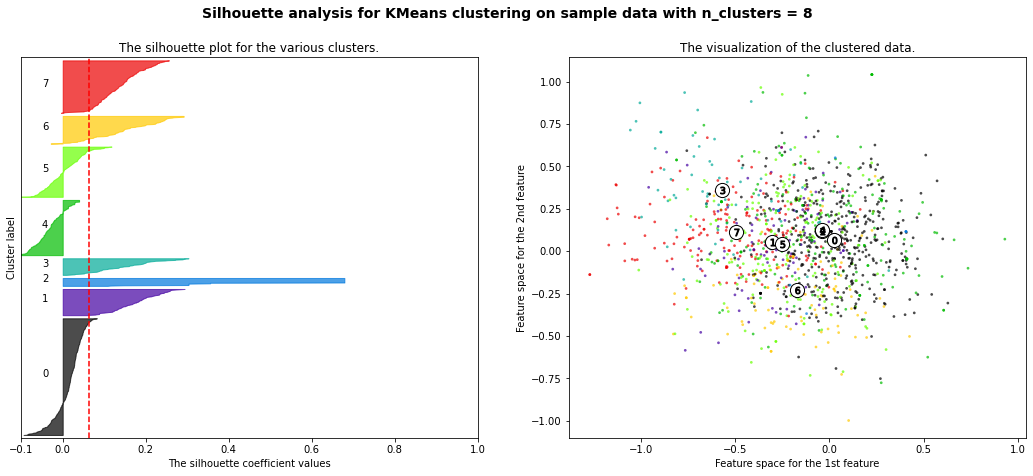

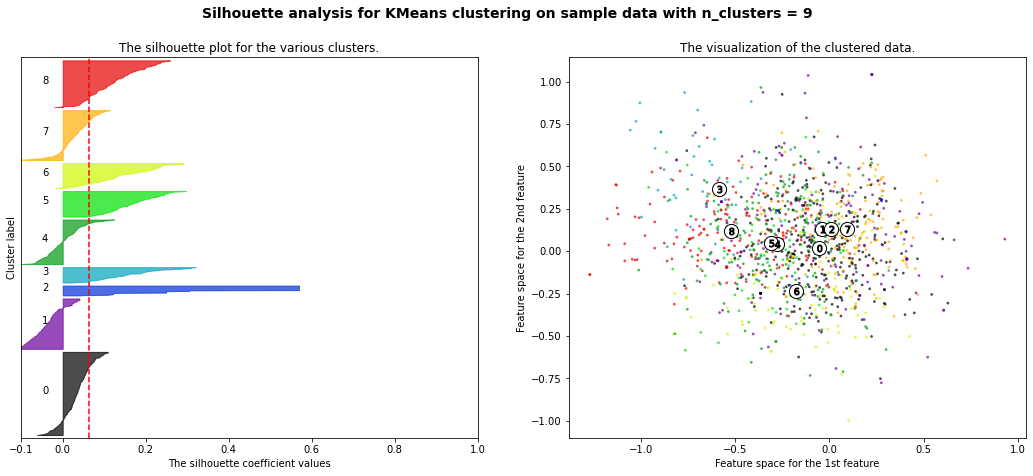

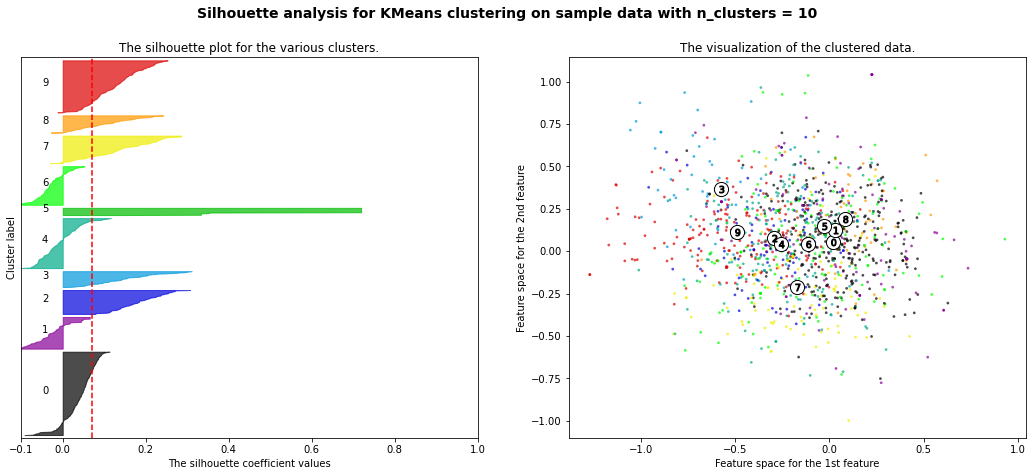

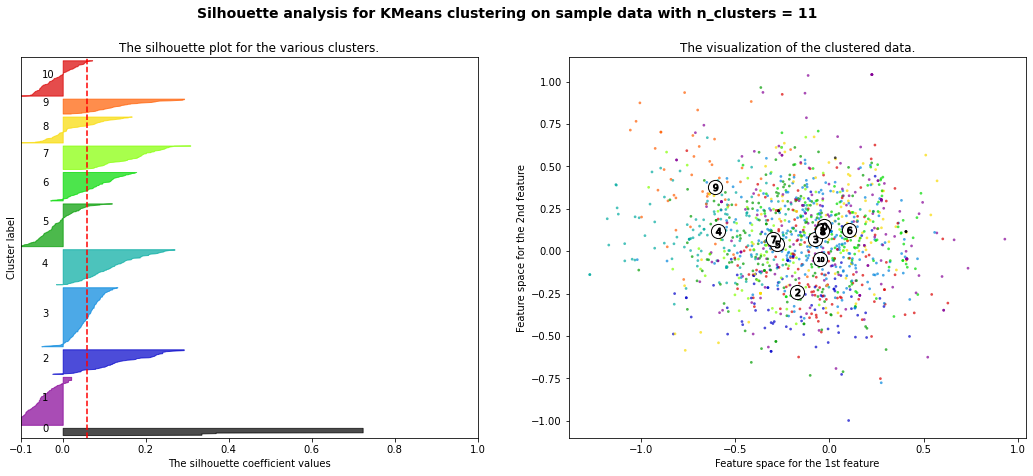

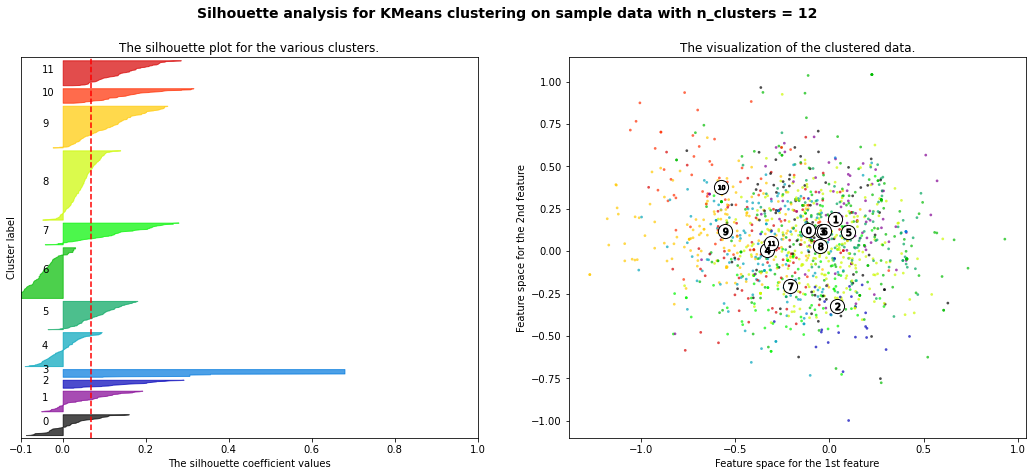

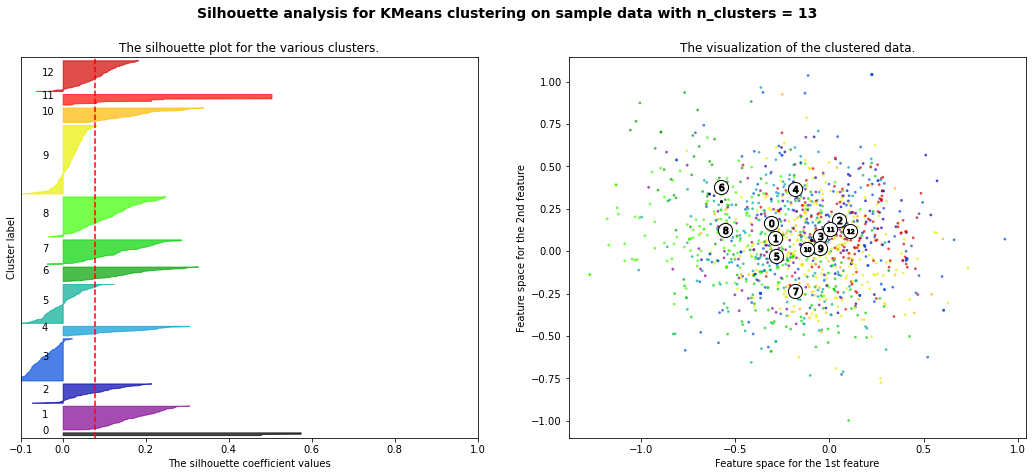

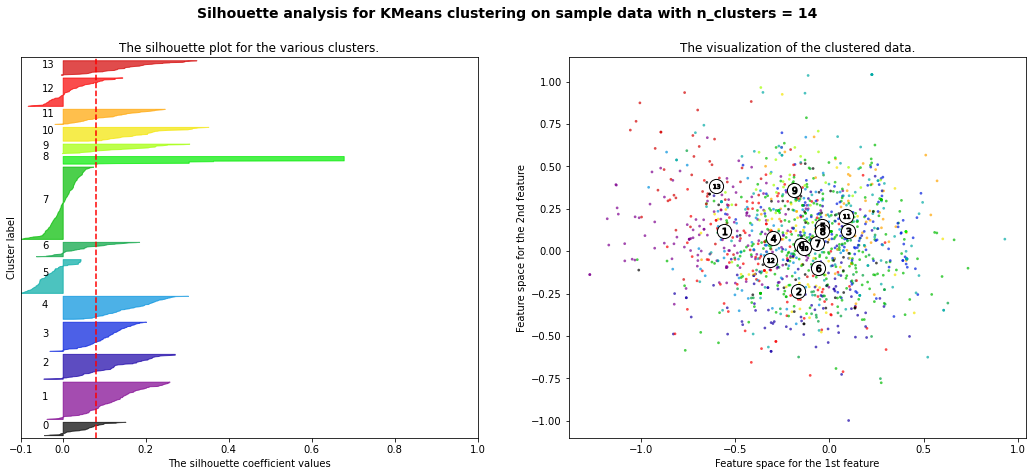

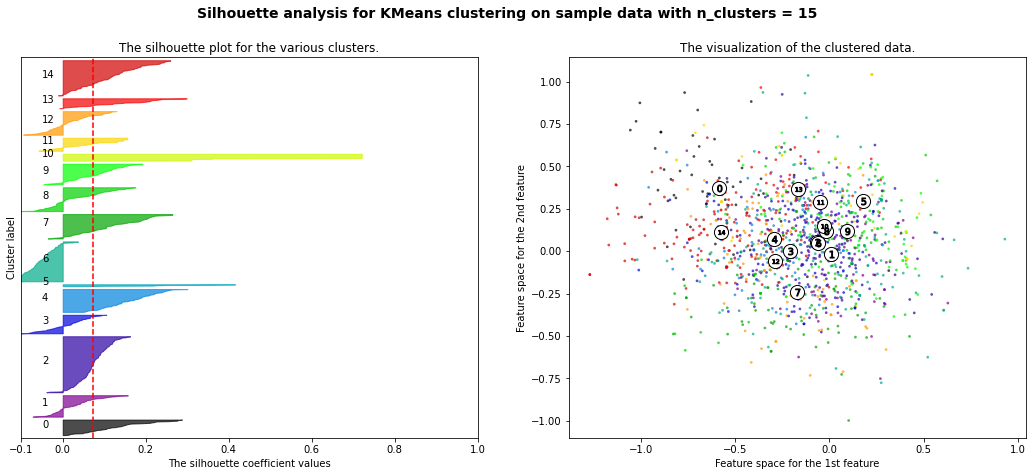

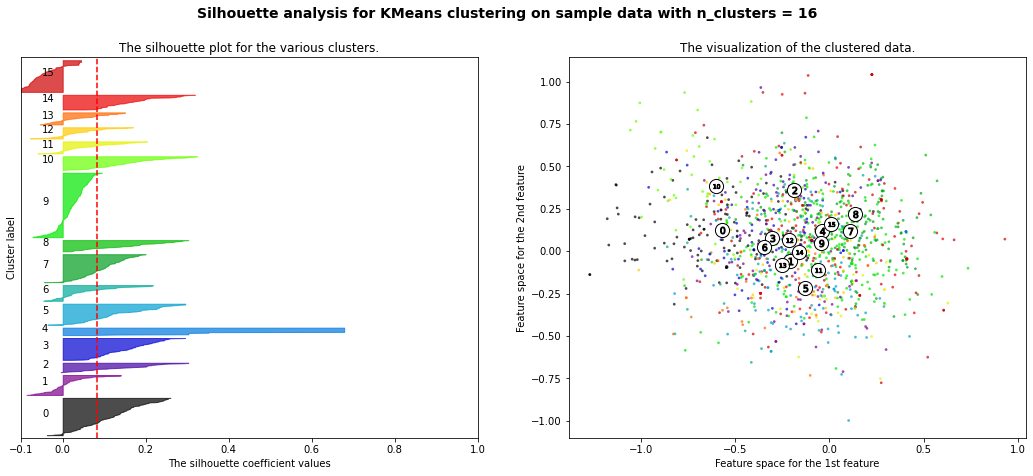

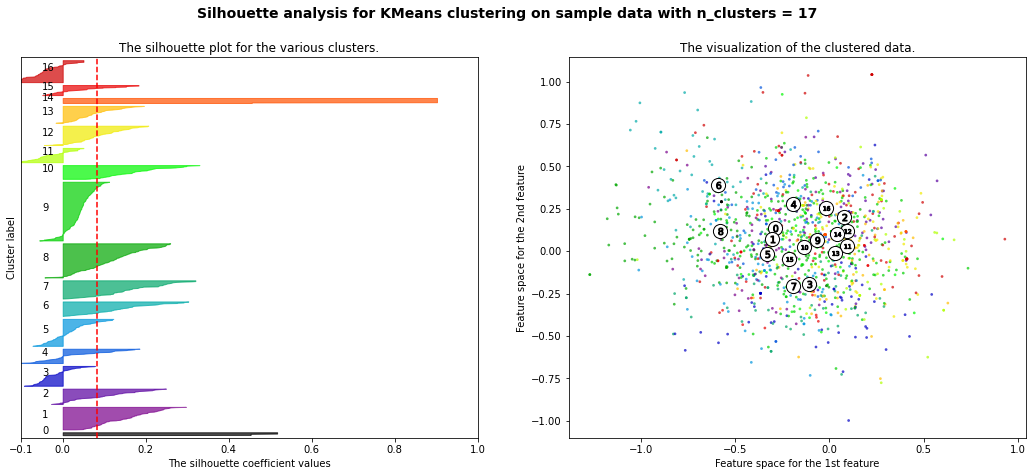

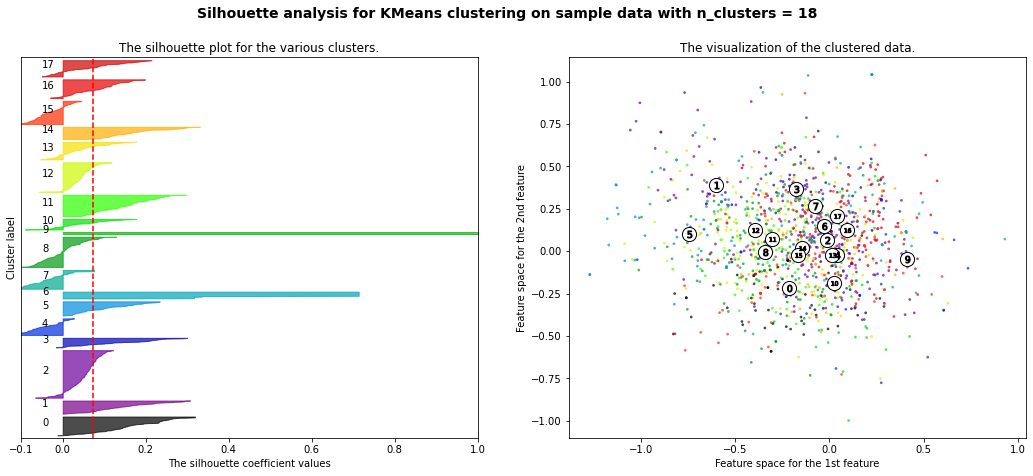

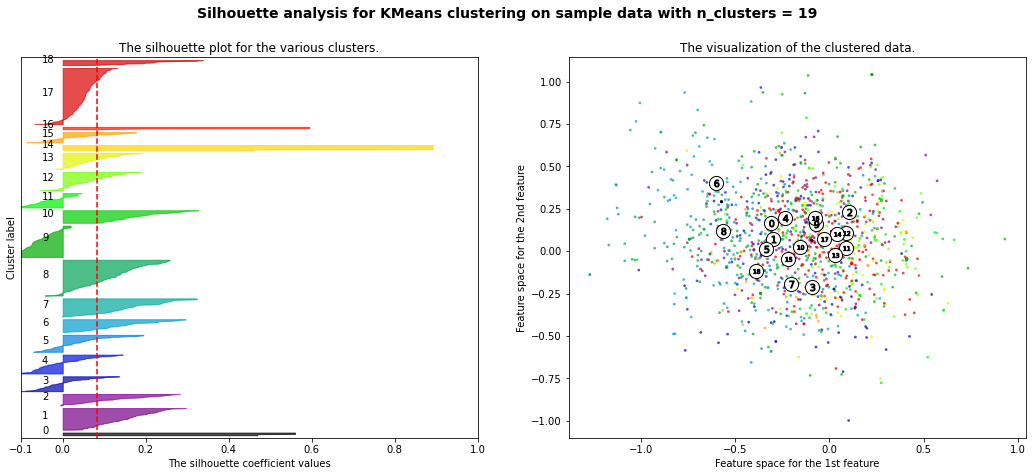

In [6]:
X = embedding

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [x for x in range(5,20)]# Change this range based on your needs

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # The 2nd subplot is the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


# Method 2. Topic Modeling BERT

https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6

In [7]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embedding)

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/umap/distances.py:1086: NumbaDeprecatio

In [8]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

Counter(cluster.labels_)

Counter({6: 26,
         15: 227,
         -1: 308,
         9: 38,
         12: 47,
         16: 56,
         4: 85,
         20: 47,
         5: 27,
         1: 54,
         8: 43,
         10: 23,
         7: 17,
         21: 21,
         19: 20,
         18: 29,
         14: 25,
         0: 26,
         3: 30,
         17: 19,
         11: 42,
         2: 31,
         13: 19})

In [9]:
docs_df = pd.DataFrame(dat['answer'].tolist(), columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [10]:
docs_per_topic

,Topic,Doc
0,-1,1st Diagnosis: How likely is it to return. All...
1,0,Nothing Nothing nothing Nothing Nothing Nothin...
2,1,"Chemo less effective, are all my nodes clear? ..."
3,2,Menopausal symptoms mask & mimic it. AI better...
4,3,remove healthy breast and / or ovaries ? Remov...
5,4,Anything about what to look for for recurrence...
6,5,Bilateral occurrence New symptoms to look out ...
7,6,That it's not a death sentence Amputation not ...
8,7,Difficult to detect l How aggressive it is How...
9,8,Choices Excellent Grows in a line or web How i...


In [11]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(dat['answer'].tolist()))

In [12]:
docs_per_topic.shape, tf_idf.shape, count

((23, 2), (1848, 23), CountVectorizer(stop_words='english'))

In [13]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(dat['answer'].tolist()))

In [14]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
0,-1,308
16,15,227
5,4,85
17,16,56
2,1,54
13,12,47
21,20,47
9,8,43
12,11,42
10,9,38


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

for i in range(10):
    # Calculate cosine similarity
    similarities = cosine_similarity(tf_idf.T)
    np.fill_diagonal(similarities, 0)

    # Extract label to merge into and from where
    topic_sizes = docs_df.groupby(['Topic']).count().sort_values("Doc", ascending=False).reset_index()
    topic_to_merge = topic_sizes.iloc[-1].Topic
    topic_to_merge_into = np.argmax(similarities[topic_to_merge + 1]) - 1

    # Adjust topics
    docs_df.loc[docs_df.Topic == topic_to_merge, "Topic"] = topic_to_merge_into
    old_topics = docs_df.sort_values("Topic").Topic.unique()
    map_topics = {old_topic: index - 1 for index, old_topic in enumerate(old_topics)}
    docs_df.Topic = docs_df.Topic.map(map_topics)
    docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

    # Calculate new topic words
    m = len(dat['answer'].tolist())
    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m)
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)

topic_sizes = extract_topic_sizes(docs_df); topic_sizes#.head(10)

,Topic,Size
0,-1,433
8,7,257
2,1,85
12,11,68
9,8,56
10,9,56
1,0,54
6,5,47
7,6,44
3,2,43


In [16]:
for ct,idx in enumerate(topic_sizes['Topic']):
    print('\nCluster',idx, 'size:', topic_sizes['Size'][ct])
    print(top_n_words[idx][:10])


Cluster -1 size: 433
[('ilc', 0.061924685032738465), ('tamoxifen', 0.029792449226235158), ('different', 0.029245555067769217), ('diagnosis', 0.028747379629031497), ('cancer', 0.027351616381939843), ('surgeon', 0.026834373318812166), ('ductal', 0.02590713741588098), ('vs', 0.025492654652871555), ('treatment', 0.024288447440870508), ('node', 0.024182114504727764)]

Cluster 7 size: 54
[('lobular', 0.11951137565395978), ('breast', 0.10140607326418033), ('cancer', 0.08176049971248961), ('dense', 0.04425484339105843), ('mammogram', 0.04278097969554276), ('breasts', 0.04239643396419429), ('mammograms', 0.03451183434496874), ('ductal', 0.03154026210189882), ('imaging', 0.02974703715636242), ('years', 0.029320667083294442)]

Cluster 1 size: 85
[('recurrence', 0.4855269305377117), ('look', 0.29342138991636035), ('reoccurrence', 0.15794917233059308), ('check', 0.1278826273805029), ('signs', 0.09413827762197206), ('recurrance', 0.08691141173038008), ('chance', 0.08094195660169837), ('future', 0.0

In [17]:
cluster_newkey = {
    -1: 'Ambiguous',
    11: 'ILC unique features',9:'ILC unique features',3:'ILC unique features',
    12: 'Influence of breast density',
    0: 'Recurrence',
    6: 'Endocrine therapy',
    10: 'Cancer detection and screening', 7: 'Cancer detection and screening',
    8: 'Metastasis',
    1: 'Chemotherapy',
    5: 'Personalized treatment and mental care',
    4: 'Radiation therapy',
    2: 'Surgery'
}

In [18]:
docs_df['new_labels'] = [
    cluster_newkey[k] for k in docs_df['Topic']
]

docs_df

,Doc,Topic,Doc_ID,new_labels
0,That it's not a death sentence,-1,0,Ambiguous
1,(nothing - she agreed to a double MX bc of lob...,7,1,Cancer detection and screening
2,1st Diagnosis: How likely is it to return.,-1,2,Ambiguous
3,A mastectomy could have been avoided if the Br...,3,3,ILC unique features
4,advantage of mastectomy over breast conserving...,3,4,ILC unique features
...,...,...,...,...
1255,That mammograms can be wrong and miss ILC - to...,7,1255,Cancer detection and screening
1256,the effects of fear of return,1,1256,Chemotherapy
1257,The fact that it can metastasize in unusual pl...,7,1257,Cancer detection and screening
1258,What specifically to look for in the future in...,1,1258,Chemotherapy


In [19]:
clustered_sentences = {
    k:docs_df[docs_df['new_labels']==k]['Doc'].tolist() for k in docs_df['new_labels'].unique() if k!= -1
}

clustered_sentences

{'Ambiguous': ["That it's not a death sentence",
  '1st Diagnosis: How likely is it to return.',
  'All that is known',
  'All the items I just entered NO for.',
  'Amputation not necessaire',
  'Basically everything. I have had to find out everything by myself',
  'Benefits/AEs of BCS/RT vs MX; risks of RT after MX with left side BC',
  'Clincially and radiologically negative lymph nodes have a good chance of being positive on post surgical pathology',
  'Different views from initial surgeon and reconstruction surgeon with initial surgeon saying wait two years post Radium for reconstruction following Radium and plastic surgeon saying no need.Confusing for patient.',
  'difficulty in diagnosing, differences between ILC and IDC,  possibility of long term recurrence',
  'Difficulty to determine size, risks of lumpectomy with radiation',
  'Everything',
  'Everything',
  'Great surgeon but handed out generic info on secondaries based on IDC',
  'Had 2nd surgery for clean margins',
  'Havi

In [20]:
def count_tokens(text):
    # Split the text into words
    words = text.split()
    
    token_count = 0
    for word in words:
        # Count characters and punctuation as separate tokens
        for char in word:
            token_count += 1
        token_count += 1  # for the space (or end of line)
    
    return token_count - 1  # Subtracting one because the last word doesn't need a space after it


def adjust_tokens(textlist, lim=32768, seed=2024): # gpt-4-32k
    
    import random
    
    prompt = f'''Think as a patient with breast cancer, and as a physician scientist studying breast cancer
            Summarize in professional scientific language one single common topic shared among answers,
            "What do you now know about ILC that you wish you could have heard from and discussed with your breast cancer doctor?" 
            The summarization should be a single, brief sentence"{textlist}"'''
    token_num = count_tokens(prompt)
    print(f'Original: {len(textlist)} elements, {token_num} tokens')
    
    while token_num > lim:
        random.seed(seed)
        textlist = random.sample(textlist, len(textlist)-1)
        prompt = f'''Think as a patient with breast cancer, and as a physician scientist studying breast cancer
            Summarize in professional scientific language one single common topic shared among answers,
            "What do you now know about ILC that you wish you could have heard from and discussed with your breast cancer doctor?" 
            The summarization should be a single, brief sentence"{textlist}"'''
        token_num = count_tokens(prompt)
        print(f'In progress: {len(textlist)} elements, {token_num} tokens')
        
    prompt = f'''Think as a patient with breast cancer, and as a physician scientist studying breast cancer
            Summarize in professional scientific language one single common topic shared among answers,
            "What do you now know about ILC that you wish you could have heard from and discussed with your breast cancer doctor?" 
            The summarization should be a single, brief sentence"{textlist}"'''    
    token_num = count_tokens(prompt)
    
    print(f'Out: {len(textlist)} elements, {token_num} tokens')
    return textlist

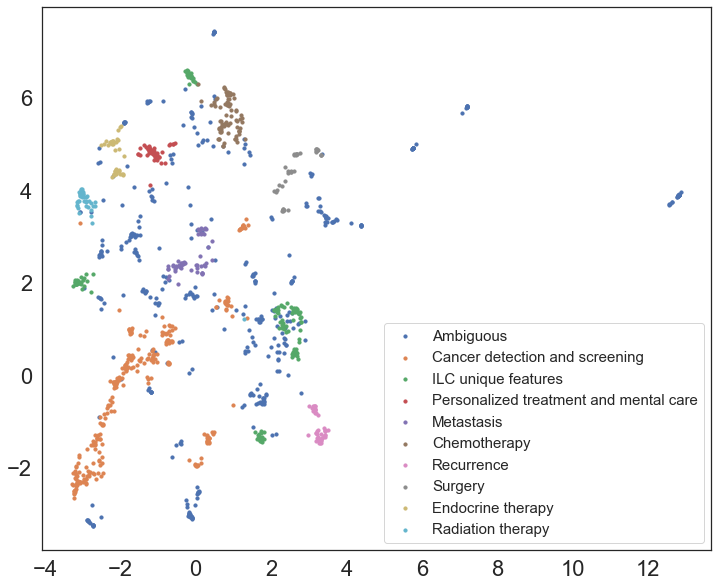

In [21]:
import matplotlib.pyplot as plt
sns.set(font_scale=2)
sns.set_style('white')

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine',\
                     random_state=2024).fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
# result['Topic'] = docs_df['Topic']
result['labels'] = docs_df['new_labels'] #cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(12, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
# plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=5)
# plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=5, cmap='hsv_r')
# plt.legend()


for label in result['labels'].unique():
    subset = clustered[clustered['labels'] == label]
    plt.scatter(subset.x, subset.y, label=label, s=10, cmap='hsv_r')

plt.legend(loc='lower right', fontsize=15)
plt.show()

# Plot

In [22]:
import pickle as pkl
with open("../data/sentence_embeddings_q52_all.pkl", "rb") as f:
    embeddings = pkl.load(f)
    
embeddings.shape, len(embeddings)

((1260, 384), 1260)

In [23]:
doc_df = pd.read_csv('../data/sentence_embeddings_q52_clusters.csv', index_col=0)
dat = pd.read_csv('../data/q52_all.csv')

doc_df['q'] = dat['q']

QuestionKeys = {
    1:'Surgeon',2:'Medical Oncologist', 3:'Radiation Oncologist', 4:'Gynecologist',5:'Another Treatment Team Member'
}
doc_df['Question'] = [QuestionKeys[k] for k in doc_df['q']]

doc_df

,Doc,Topic,Doc_ID,new_labels,q,Question
0,That it's not a death sentence,-1,0,Ambiguous,1,Surgeon
1,(nothing - she agreed to a double MX bc of lob...,9,1,ILC unique features,1,Surgeon
2,1st Diagnosis: How likely is it to return.,-1,2,Ambiguous,1,Surgeon
3,A mastectomy could have been avoided if the Br...,2,3,Surgery,1,Surgeon
4,advantage of mastectomy over breast conserving...,2,4,Surgery,1,Surgeon
...,...,...,...,...,...,...
1255,That mammograms can be wrong and miss ILC - to...,12,1255,Influence of breast density,5,Another Treatment Team Member
1256,the effects of fear of return,0,1256,Recurrence,5,Another Treatment Team Member
1257,The fact that it can metastasize in unusual pl...,-1,1257,Ambiguous,5,Another Treatment Team Member
1258,What specifically to look for in the future in...,0,1258,Recurrence,5,Another Treatment Team Member


In [24]:
Counter(doc_df['new_labels'].tolist())

Counter({'Ambiguous': 382,
         'ILC unique features': 247,
         'Surgery': 39,
         'Personalized treatment and mental care': 45,
         'Cancer detection and screening': 116,
         'Recurrence': 87,
         'Metastasis': 59,
         'Influence of breast density': 109,
         'Chemotherapy': 54,
         'Endocrine therapy': 81,
         'Radiation therapy': 41})

In [25]:
doc_df['new_labels2'] = [
    'Recurrence and metastasis' if x in ['Recurrence','Metastasis'] else x for x in doc_df['new_labels']
]

doc_df

,Doc,Topic,Doc_ID,new_labels,q,Question,new_labels2
0,That it's not a death sentence,-1,0,Ambiguous,1,Surgeon,Ambiguous
1,(nothing - she agreed to a double MX bc of lob...,9,1,ILC unique features,1,Surgeon,ILC unique features
2,1st Diagnosis: How likely is it to return.,-1,2,Ambiguous,1,Surgeon,Ambiguous
3,A mastectomy could have been avoided if the Br...,2,3,Surgery,1,Surgeon,Surgery
4,advantage of mastectomy over breast conserving...,2,4,Surgery,1,Surgeon,Surgery
...,...,...,...,...,...,...,...
1255,That mammograms can be wrong and miss ILC - to...,12,1255,Influence of breast density,5,Another Treatment Team Member,Influence of breast density
1256,the effects of fear of return,0,1256,Recurrence,5,Another Treatment Team Member,Recurrence and metastasis
1257,The fact that it can metastasize in unusual pl...,-1,1257,Ambiguous,5,Another Treatment Team Member,Ambiguous
1258,What specifically to look for in the future in...,0,1258,Recurrence,5,Another Treatment Team Member,Recurrence and metastasis


In [26]:
Counter(doc_df['Question'])

Counter({'Surgeon': 354,
         'Medical Oncologist': 471,
         'Radiation Oncologist': 153,
         'Gynecologist': 153,
         'Another Treatment Team Member': 129})

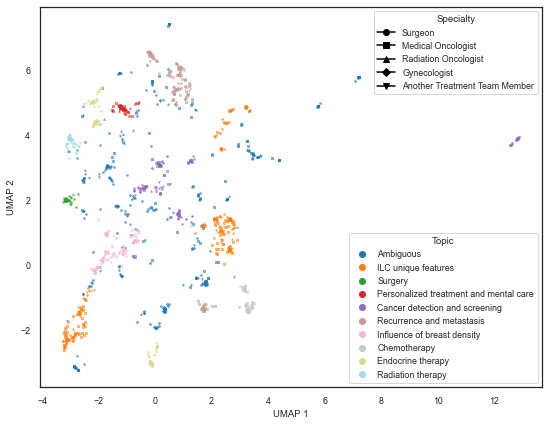

In [27]:
import matplotlib.pyplot as plt
import umap
from matplotlib import cm

sns.set(font_scale=.8)
sns.set_style('white')

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine',\
                     random_state=2024).fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
# result['Topic'] = docs_df['Topic']
result['labels'] = doc_df['new_labels2'] #cluster.labels_
result['Question'] = doc_df['Question']

# Visualize clusters
fig, ax = plt.subplots(figsize=(9, 7))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
# plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=5)
# plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=5, cmap='hsv_r')
# plt.legend()

cmap = cm.get_cmap('tab20', len(result['labels'].unique()))
color_map = {category: cmap(i) for i, category in enumerate(result['labels'].unique())}
marker_map = {mtype: marker for mtype, marker in zip(result['Question'].unique(), ['o', 's', '^', 'D', 'v'])}

for label,color in color_map.items():
    for question, marker in marker_map.items():
        
        subset = clustered[(clustered['labels'] == label) & (clustered['Question'] == question)]
        ax.scatter(subset.x, subset.y, color=color, s=3, marker=marker, alpha=.5)

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')


legend1 = ax.legend([plt.Line2D([0], [0], color=color, marker='o', linestyle='None') for color in color_map.values()],
                     list(color_map.keys()), title='Topic', loc='lower right')

legend2 = ax.legend([plt.Line2D([0], [0], color='black', marker=marker) for marker in marker_map.values()],
                     list(marker_map.keys()), title='Specialty', loc='upper right')
plt.gca().add_artist(legend1)

<AxesSubplot:>

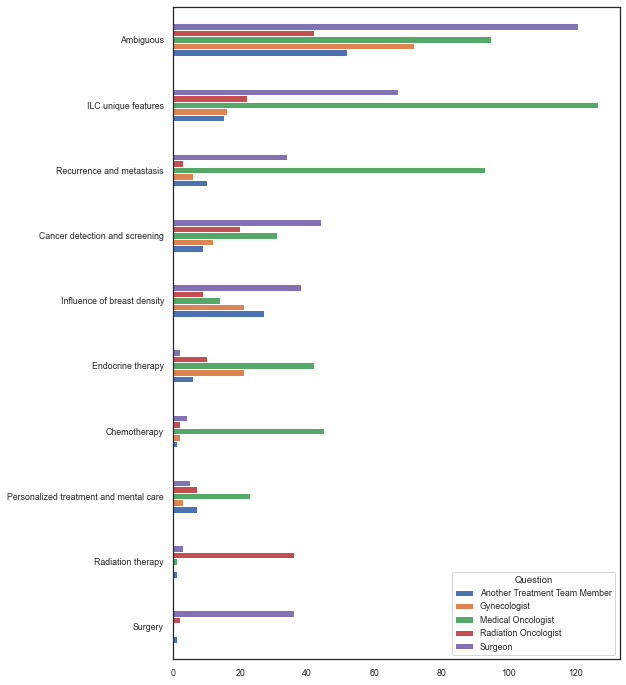

In [28]:
rankings = pd.Series(Counter(doc_df['new_labels2'])).sort_values(ascending=True)[-10:].index

res = doc_df.groupby(['new_labels2','Question']).size().unstack().fillna(0).loc[rankings,:]

fig,ax = plt.subplots(figsize=(8,12))
res.plot.barh(ax=ax)